Set the context, environment and features

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('Processed_Data.csv')

In [ ]:
df

,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,number_of_words,stopwords_frequency,av_word_per_sen,...,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity
0,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,0.498084,14.500000,...,0.099639,0.422997,0.245068,0.275570,0.203065,0.065134,0.111111,0.377358,0.317073,0.119650
1,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.581614,38.071429,...,0.055175,0.506789,0.398650,0.397796,0.200750,0.061914,0.103189,0.373832,0.296875,0.110981
2,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.515625,16.842105,...,0.073317,0.472376,0.699098,0.433225,0.221875,0.043750,0.090625,0.380282,0.277778,0.105634
3,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,0.559066,20.222222,...,0.055877,0.412691,0.629558,0.498259,0.188187,0.043956,0.119505,0.569343,0.184466,0.105024
4,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.521368,78.000000,...,0.085833,0.551796,0.110281,0.096727,0.230769,0.034188,0.119658,0.481481,0.150000,0.072222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,0.430168,29.833333,...,0.110204,0.593374,0.062313,0.044963,0.329609,0.072626,0.100559,0.186441,0.315789,0.058876
3907,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,0.526882,29.062500,...,0.067620,0.325690,0.327018,0.124590,0.273118,0.032258,0.030108,0.370079,0.301887,0.111722
3908,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,0.525292,32.125000,...,0.089931,0.383324,0.388689,0.460645,0.214008,0.031128,0.120623,0.454545,0.777778,0.353535
3909,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,0.527451,24.285714,...,0.064596,0.444652,0.510104,0.471795,0.223529,0.027451,0.113725,0.526316,0.638889,0.336257


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
selected_features = pd.concat([df.iloc[:,7:], df['cohesion'], df['vocabulary']], axis = 1)
train_data, test_data = train_test_split(selected_features, test_size= 0.2,  random_state = 2)

In [ ]:
test_data.shape

(783, 38)

In [ ]:
train_data

,number_of_words,stopwords_frequency,av_word_per_sen,punctuations,ARI,freq_of_verb,freq_of_adj,freq_of_adv,freq_of_distinct_adj,freq_of_distinct_adv,...,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity,cohesion,vocabulary
1749,389,0.437018,14.961538,0.075650,6,0.089974,0.105398,0.010283,0.071979,0.007712,...,0.583806,0.545659,0.316195,0.046272,0.095116,0.333333,0.114286,0.038095,3.5,4.0
2304,320,0.440625,21.333333,0.084270,9,0.140625,0.056250,0.065625,0.050000,0.021875,...,0.518039,0.277898,0.303125,0.031250,0.081250,0.185567,0.466667,0.086598,3.0,2.0
2458,228,0.368421,15.200000,0.061728,6,0.109649,0.122807,0.078947,0.052632,0.048246,...,0.713681,0.509217,0.250000,0.008772,0.065789,0.491228,0.720000,0.353684,3.5,3.5
1383,457,0.509847,19.869565,0.060241,8,0.098468,0.098468,0.028446,0.056893,0.019694,...,0.578532,0.800124,0.216630,0.050328,0.113786,0.454545,0.288889,0.131313,4.0,4.5
1354,455,0.595604,75.833333,0.042194,34,0.079121,0.090110,0.039560,0.065934,0.021978,...,0.287504,0.148577,0.219780,0.057143,0.142857,0.410000,0.500000,0.205000,2.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,277,0.487365,11.080000,0.082508,4,0.068592,0.072202,0.061372,0.061372,0.046931,...,0.559748,0.224948,0.277978,0.039711,0.126354,0.259740,0.894737,0.232399,3.5,3.5
1608,283,0.551237,28.300000,0.080645,12,0.102473,0.084806,0.067138,0.077739,0.021201,...,0.249115,0.261299,0.197880,0.042403,0.098940,0.428571,0.655172,0.280788,3.5,3.0
2541,305,0.419672,12.200000,0.130790,6,0.121311,0.118033,0.068852,0.055738,0.026230,...,0.532533,0.448009,0.242623,0.049180,0.075410,0.486486,0.567568,0.276114,2.5,3.0
2575,847,0.521842,29.206897,0.057650,13,0.120425,0.064935,0.029516,0.049587,0.010626,...,0.704079,0.609323,0.251476,0.061393,0.112161,0.258216,0.245098,0.063288,3.5,3.0


In [ ]:
feature_columns = []
coherence_score = tf.feature_column.numeric_column("coherence_score")
feature_columns.append(coherence_score)
ttr = tf.feature_column.numeric_column("ttr")
feature_columns.append(ttr)
freq_diff_words = tf.feature_column.numeric_column("freq_diff_words")
feature_columns.append(freq_diff_words)
number_of_diff_words = tf.feature_column.numeric_column("number_of_diff_words")
feature_columns.append(number_of_diff_words)
dale = tf.feature_column.numeric_column("dale_chall_readability_score")
feature_columns.append(dale)
mcalpine_eflaw = tf.feature_column.numeric_column("mcalpine_eflaw")
feature_columns.append(mcalpine_eflaw)
ts = tf.feature_column.numeric_column("text_standard")
feature_columns.append(ts)

fle = tf.feature_column.numeric_column("flesch_kincaid_grade")
feature_columns.append(fle)
disadv = tf.feature_column.numeric_column("freq_of_distinct_adv")
feature_columns.append(disadv)
disadj = tf.feature_column.numeric_column("freq_of_distinct_adj")
feature_columns.append(disadj)
feature_columns.append(tf.feature_column.numeric_column("freq_of_adv"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_adj"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_verb"))
feature_columns.append(tf.feature_column.numeric_column("ARI"))
feature_columns.append(tf.feature_column.numeric_column("punctuations"))
feature_columns.append(tf.feature_column.numeric_column("av_word_per_sen"))
feature_columns.append(tf.feature_column.numeric_column("stopwords_frequency"))
feature_columns.append(tf.feature_column.numeric_column("number_of_words"))
feature_columns.append(tf.feature_column.numeric_column("flesch_reading_ease"))
feature_columns.append(tf.feature_column.numeric_column("Incorrect_form_ratio"))
feature_columns.append(tf.feature_column.numeric_column("num_of_short_forms"))
feature_columns.append(tf.feature_column.numeric_column("num_of_grammar_errors"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_negative"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_positive"))
feature_columns.append(tf.feature_column.numeric_column("sentiment_compound"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_wrong_words"))
feature_columns.append(tf.feature_column.numeric_column("sentence_complexity"))
feature_columns.append(tf.feature_column.numeric_column("lexrank_avg_min_diff"))
feature_columns.append(tf.feature_column.numeric_column("lexrank_interquartile"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_noun"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_transition"))
feature_columns.append(tf.feature_column.numeric_column("freq_of_pronoun"))
feature_columns.append(tf.feature_column.numeric_column("noun_to_adj"))
feature_columns.append(tf.feature_column.numeric_column("verb_to_adv"))
feature_columns.append(tf.feature_column.numeric_column("phrase_diversity"))











my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_columns.append(tf.feature_column.numeric_column("vocabulary"))
my_new_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


In [ ]:
len(feature_columns)

36

Basic functions

In [ ]:
def accuracy_range(Ytrue, Ypred):
    accurate_range=0
    for i in range(len(Ytrue)):
        if abs(Ytrue[i] - Ypred[i])<=0.5:
            accurate_range+=1
    return accurate_range/len(Ytrue)

def result(predictions):
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

def accuracy(Ytrue, Ypred):
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

def error_rate(Ytrue, Ypred):
    error=0
    for i in range(len(Ytrue)):
        error += abs(Ytrue[i] - Ypred[i])
    return error/len(Ytrue)

Simple one layer linear model

In [ ]:
def create_model_simple(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""

  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1))
  

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error", 
                metrics=[tf.keras.metrics.MeanSquaredError(), "accuracy"])
  return model   

In [ ]:
def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, validation_split=0.2, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  mse_train = history.history['loss']
  mse_val = history.history['val_loss']

  return mse_train, mse_val

In [ ]:
def plot_the_loss_curve(mse_train, mse_val):
  """Plot a curve of loss vs. epoch."""

  plt.figure(figsize=(10, 8))
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(mse_train, label="Training Loss")
  plt.plot(mse_val, label="Validation Loss")
  plt.legend()
  # plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 8s - loss: 8425.1289 - mean_squared_error: 8425.1289 - accuracy: 0.0000e+00

10/10 [==============================] - 1s 64ms/step - loss: 2637.1667 - mean_squared_error: 2637.1667 - accuracy: 7.9936e-04 - val_loss: 644.4424 - val_mean_squared_error: 644.4424 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 316.8473 - mean_squared_error: 316.8473 - accuracy: 7.9936e-04 - val_loss: 277.6530 - val_mean_squared_error: 277.6530 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 147.8104 - mean_squared_error: 147.8104 - accuracy: 7.9936e-04 - val_loss: 119.0141 - val_mean_squared_error: 119.0141 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 69.5086 - mean_squared_error: 69.5086 - accuracy: 7.9936e-04 - val_loss: 46.0575 - val_mean_squared_error: 46.0575 - val_accuracy: 0.0032
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 36.1979 - mean_squared_error: 36.1979 - accuracy: 7.9936e-04 - val_loss: 25.2726 - v

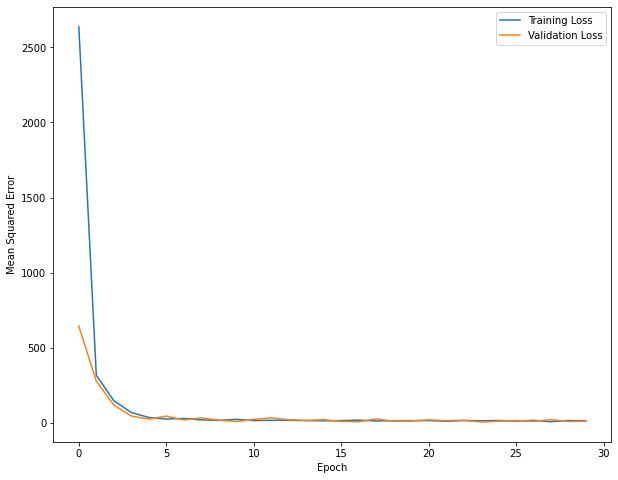

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"
model_simple1 = create_model_simple(learning_rate, my_feature_layer)

mse_train_simple1, mse_val_simple1 = train_model(model_simple1, train_data, number_epochs, batch_size, label_name)

plot_the_loss_curve(mse_train_simple1, mse_val_simple1)

In [ ]:
test_data.pop("corrected_text")
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("vocabulary")
test_label = np.array(test_features.pop(label_name))
prediction_simple1 = model_simple1.predict(test_features)
pre_list = []
for value in prediction_simple1:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
co_accuracy = accuracy_range(pre_list, list(test_data['cohesion']))
co_accuracy

0.01532567049808429

In [ ]:
co_accuracy2 = accuracy(list(test_data['cohesion']), pre_list_2)
co_accuracy2

0.01532567049808429

In [ ]:
error_rate1 = error_rate(list(test_data['cohesion']), pre_list)
error_rate1

3.104546804176132

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30


 1/10 [==>...........................] - ETA: 11s - loss: 8159.3252 - mean_squared_error: 8159.3252 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 69ms/step - loss: 2179.2454 - mean_squared_error: 2179.2454 - accuracy: 0.0000e+00 - val_loss: 178.9626 - val_mean_squared_error: 178.9626 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 109.1722 - mean_squared_error: 109.1722 - accuracy: 0.0000e+00 - val_loss: 81.3869 - val_mean_squared_error: 81.3869 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 76.2715 - mean_squared_error: 76.2715 - accuracy: 0.0000e+00 - val_loss: 68.2270 - val_mean_squared_error: 68.2270 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 60.7689 - mean_squared_error: 60.7689 - accuracy: 0.0000e+00 - val_loss: 51.5881 - val_mean_squared_error: 51.5881 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 43.4995 - mean_squared_error: 43.4995 - accuracy: 0.0000e+00 - val_loss: 4

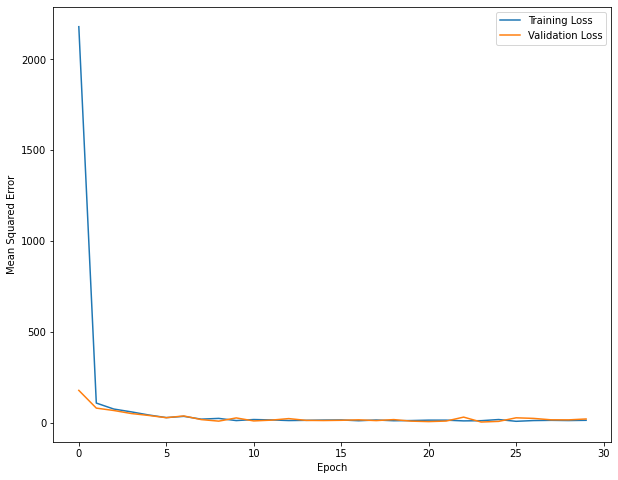

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "vocabulary"

# Establish the model's topography.
model_simple = create_model_simple(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
mse_train_simple, mse_val_simple = train_model(model_simple, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_simple, mse_val_simple)

In [ ]:
label2 = "cohesion"
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop(label2)
test_label = np.array(test_features.pop(label_name))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result = model_simple.evaluate(x=test_features, y=test_label, batch_size=batch_size)

for item in zip(model_simple.metrics_names, result):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 21.4754 - mean_squared_error: 21.4754 - accuracy: 0.0000e+00
loss 21.475412368774414
mean_squared_error 21.475412368774414
accuracy 0.0


In [ ]:
prediction = model_simple.predict(test_features)
pre_list = []
for value in prediction:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
val_accuracy = accuracy_range(list(test_data['vocabulary']), pre_list)
val_accuracy

0.005108556832694764

In [ ]:
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.006385696040868455

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 8s - loss: 7963.3359 - mean_squared_error: 7963.3359 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 68ms/step - loss: 2761.5852 - mean_squared_error: 2761.5852 - accuracy: 3.9968e-04 - val_loss: 755.4699 - val_mean_squared_error: 755.4699 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 571.5588 - mean_squared_error: 571.5588 - accuracy: 0.0000e+00 - val_loss: 416.0566 - val_mean_squared_error: 416.0566 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 369.5432 - mean_squared_error: 369.5432 - accuracy: 0.0000e+00 - val_loss: 273.2668 - val_mean_squared_error: 273.2668 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 245.1992 - mean_squared_error: 245.1992 - accuracy: 0.0000e+00 - val_loss: 181.7391 - val_mean_squared_error: 181.7391 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 152.5399 - mean_squared_error: 152.5399 - accuracy: 0.0000e+00 

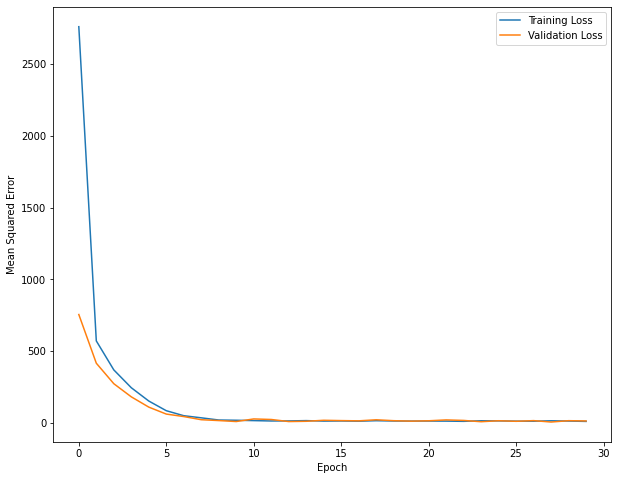

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_simple_cohesion = create_model_simple(learning_rate, my_new_feature_layer)

# Train the model on the normalized training set.
mse_train_simple_cohesion, mse_val_simple_cohesion = train_model(model_simple_cohesion, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_simple_cohesion, mse_val_simple_cohesion)

In [ ]:
test_data2 = test_data.copy()
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list
test_features_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_cohesion = np.array(test_features_cohesion.pop("cohesion"))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_cohesion = model_simple_cohesion.evaluate(x=test_features_cohesion, y=test_label_cohesion, batch_size=batch_size)

for item in zip(model_simple_cohesion.metrics_names, result_cohesion):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 6.7368 - mean_squared_error: 6.7368 - accuracy: 0.0038
loss 6.736788749694824
mean_squared_error 6.736788749694824
accuracy 0.0038314175326377153


In [ ]:
prediction_cohesion = model_simple_cohesion.predict(test_features_cohesion)
pre_list = []
for value in prediction_cohesion:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
cohesion_accuracy = accuracy_range(pre_list, list(test_data['cohesion']))
cohesion_accuracy

0.0421455938697318

In [ ]:
cohesion_accuracy_2 = accuracy(list(test_data['cohesion']), pre_list_2)
cohesion_accuracy_2

0.01532567049808429

In [ ]:
error_rate2 = error_rate(list(test_data['cohesion']), pre_list)
error_rate2

2.289988109682559

Linear Model 2

In [ ]:
def create_model_linear(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""

  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(30, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=1))
  

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error", 
                metrics=[tf.keras.metrics.MeanSquaredError(), "accuracy"])
  return model           

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 9s - loss: 704.7987 - mean_squared_error: 704.7987 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 67ms/step - loss: 2627.9651 - mean_squared_error: 2627.9651 - accuracy: 3.9968e-04 - val_loss: 21.0147 - val_mean_squared_error: 21.0147 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 15.7750 - mean_squared_error: 15.7750 - accuracy: 0.0016 - val_loss: 42.4186 - val_mean_squared_error: 42.4186 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 56.9509 - mean_squared_error: 56.9509 - accuracy: 0.0012 - val_loss: 30.7489 - val_mean_squared_error: 30.7489 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 80.1713 - mean_squared_error: 80.1713 - accuracy: 3.9968e-04 - val_loss: 141.0663 - val_mean_squared_error: 141.0663 - val_accuracy: 0.0032
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 29.8346 - mean_squared_error: 29.8346 - accuracy: 0.0016 - val_loss: 4.6488 - val_mean_squared_erro

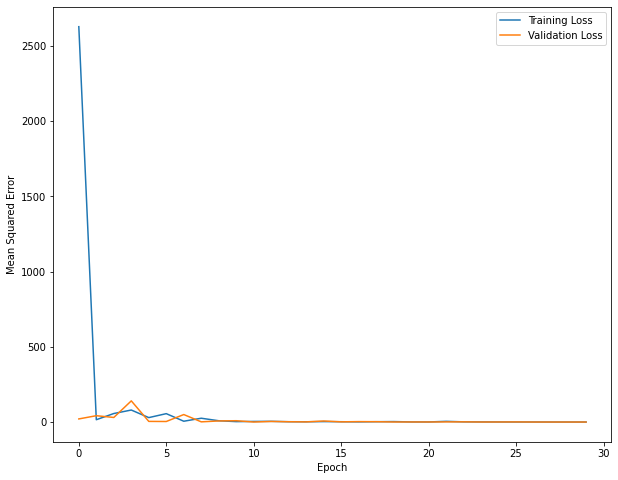

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_lr1 = create_model_linear(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
mse_train_lr1, mse_val_lr1 = train_model(model_lr1, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_lr1, mse_val_lr1)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("vocabulary")
test_label = np.array(test_features.pop(label_name))
prediction_lr1 = model_lr1.predict(test_features)
pre_list = []
for value in prediction_lr1:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
co_accuracy_lr = accuracy_range(pre_list, list(test_data['cohesion']))
co_accuracy_lr

0.5708812260536399

In [ ]:
co_accuracy2_lr = accuracy(list(test_data['cohesion']), pre_list_2)
co_accuracy2_lr

0.2950191570881226

In [ ]:
error_rate3 = error_rate(list(test_data['cohesion']), pre_list)
error_rate3

0.5164571394561046

Train on vocabulary

Epoch 1/30


 1/10 [==>...........................] - ETA: 10s - loss: 1518.2764 - mean_squared_error: 1518.2764 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 70ms/step - loss: 3491.9597 - mean_squared_error: 3491.9597 - accuracy: 0.0000e+00 - val_loss: 10.2587 - val_mean_squared_error: 10.2587 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 2.6415 - mean_squared_error: 2.6415 - accuracy: 0.0000e+00 - val_loss: 1.1840 - val_mean_squared_error: 1.1840 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 10.4859 - mean_squared_error: 10.4859 - accuracy: 0.0000e+00 - val_loss: 64.7099 - val_mean_squared_error: 64.7099 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 107.8797 - mean_squared_error: 107.8797 - accuracy: 0.0000e+00 - val_loss: 128.7098 - val_mean_squared_error: 128.7098 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 55.7076 - mean_squared_error: 55.7076 - accuracy: 0.0000e+00 - val_loss: 200.2

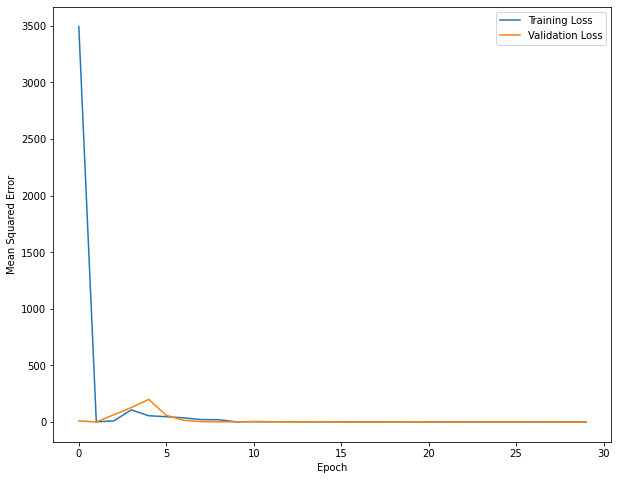

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "vocabulary"

# Establish the model's topography.
model_lr = create_model_linear(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
mse_train_lr, mse_val_lr = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_lr, mse_val_lr)

In [ ]:
label2 = "cohesion"

test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop(label2)
test_label = np.array(test_features.pop(label_name))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result = model_lr.evaluate(x=test_features, y=test_label, batch_size=batch_size)

for item in zip(model_lr.metrics_names, result):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:


4/4 [==============================] - 1s 4ms/step - loss: 0.5979 - mean_squared_error: 0.5979 - accuracy: 0.0026
loss 0.5978804230690002
mean_squared_error 0.5978804230690002
accuracy 0.0025542783550918102


In [ ]:
prediction = model_lr.predict(test_features)


25/25 [==============================] - 0s 7ms/step


Calculate vocabulary prediction accuracy

In [ ]:
pre_list = []
for value in prediction:
  pre_list.append(value[0])

In [ ]:
val_accuracy = accuracy_range(pre_list, list(test_data['vocabulary']))
val_accuracy

0.42528735632183906

In [ ]:
def result(predictions):
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

def accuracy(Ytrue, Ypred):
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

In [ ]:
pre_list_2 = result(pre_list)

In [ ]:
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.20051085568326948

Train model for cohesion using vocabulary

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 10s - loss: 10.4112 - mean_squared_error: 10.4112 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 67ms/step - loss: 3095.9434 - mean_squared_error: 3095.9434 - accuracy: 0.0012 - val_loss: 8.2021 - val_mean_squared_error: 8.2021 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 11ms/step - loss: 18.6451 - mean_squared_error: 18.6451 - accuracy: 0.0012 - val_loss: 25.1809 - val_mean_squared_error: 25.1809 - val_accuracy: 0.0016
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 84.3272 - mean_squared_error: 84.3272 - accuracy: 0.0012 - val_loss: 88.1026 - val_mean_squared_error: 88.1026 - val_accuracy: 0.0016
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 53.3260 - mean_squared_error: 53.3260 - accuracy: 0.0012 - val_loss: 74.2076 - val_mean_squared_error: 74.2076 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 86.5301 - mean_squared_error: 86.5301 - accuracy: 0.0012 - val_loss: 2.2371 - val_mean_squared_error: 2.23

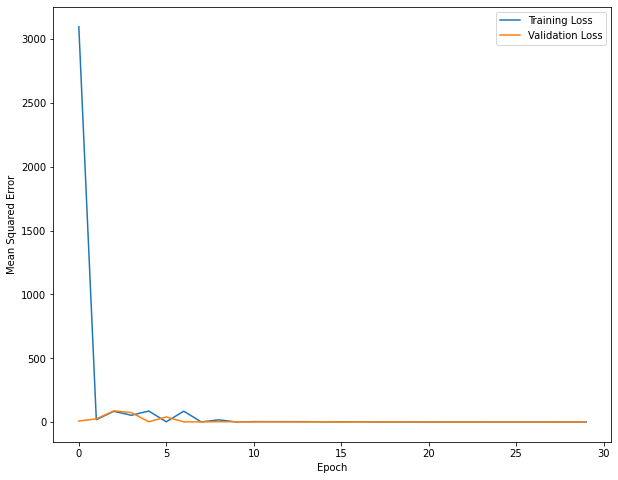

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_lr_cohesion = create_model_linear(learning_rate, my_new_feature_layer)

# Train the model on the normalized training set.
mse_train_lr_cohesion, mse_val_lr_cohesion = train_model(model_lr_cohesion, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_lr_cohesion, mse_val_lr_cohesion)

Using test data to get the estimation

In [ ]:
test_data2 = test_data.copy()
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list
test_features_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_cohesion = np.array(test_features_cohesion.pop("cohesion"))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_cohesion = model_lr_cohesion.evaluate(x=test_features_cohesion, y=test_label_cohesion, batch_size=batch_size)

for item in zip(model_lr_cohesion.metrics_names, result_cohesion):
  print (item[0], item[1])



 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 0.4601 - mean_squared_error: 0.4601 - accuracy: 0.0051
loss 0.460055947303772
mean_squared_error 0.460055947303772
accuracy 0.0051085567101836205


In [ ]:
prediction_cohesion = model_lr_cohesion.predict(test_features_cohesion)


25/25 [==============================] - 0s 3ms/step


In [ ]:
pre_list_cohesion = []
for value in prediction_cohesion:
  pre_list_cohesion.append(value[0])

Calculate accuracy for cohesion using vocabulary

In [ ]:
cohesion_accuracy = accuracy_range(pre_list_cohesion, list(test_data['cohesion']))
cohesion_accuracy

0.5389527458492975

In [ ]:
pre_list_2_cohesion = result(pre_list_cohesion)

In [ ]:
val_accuracy_2_cohesion = accuracy(list(test_data['cohesion']), pre_list_2_cohesion)
val_accuracy_2_cohesion

0.25925925925925924

In [ ]:
error_rate4 = error_rate(list(test_data['cohesion']), pre_list_cohesion)
error_rate4

0.5572012353826452

Building deep model

In [ ]:
def create_model_deep(my_learning_rate, my_feature_layer, layers=[20, 12]):

  model = tf.keras.models.Sequential()

  model.add(my_feature_layer)

  for index, layer in enumerate(layers):
    model.add(tf.keras.layers.Dense(units=layer, 
                                    activation='relu', 
                                    name=f'Hidden{index}'))
  
  model.add(tf.keras.layers.Dense(units=1, name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError(), 'accuracy'])
  return model

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 9s - loss: 148.1801 - mean_squared_error: 148.1801 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 68ms/step - loss: 122.7251 - mean_squared_error: 122.7251 - accuracy: 7.9936e-04 - val_loss: 104.8239 - val_mean_squared_error: 104.8239 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 33.3755 - mean_squared_error: 33.3755 - accuracy: 0.0012 - val_loss: 18.5569 - val_mean_squared_error: 18.5569 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 13.1803 - mean_squared_error: 13.1803 - accuracy: 0.0016 - val_loss: 2.8394 - val_mean_squared_error: 2.8394 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 4.4997 - mean_squared_error: 4.4997 - accuracy: 7.9936e-04 - val_loss: 3.7246 - val_mean_squared_error: 3.7246 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 2.0252 - mean_squared_error: 2.0252 - accuracy: 0.0016 - val_loss: 2.9364 - val_mean_squared_error: 

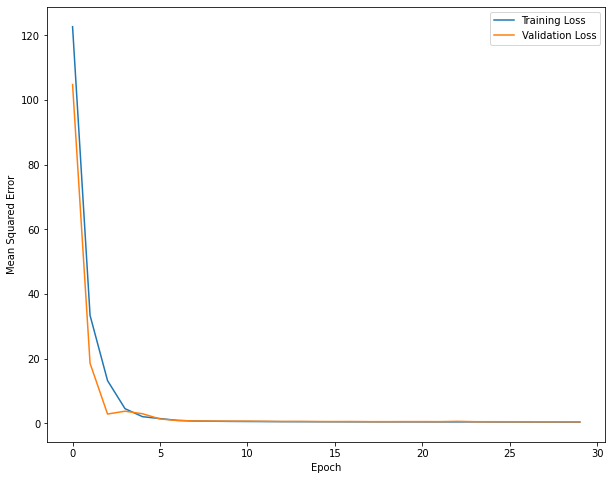

In [ ]:
learning_rate = 0.01


label_name = "cohesion"


model_deep1 = create_model_deep(learning_rate, my_feature_layer, [30, 12])


number_epochs = 30

mse_train_deep1, mse_val_deep1 = train_model(model_deep1, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep1, mse_val_deep1)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("vocabulary")
test_label = np.array(test_features.pop(label_name))
prediction_deep1 = model_deep1.predict(test_features)
pre_list = []
for value in prediction_deep1:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 2ms/step


In [ ]:
co_accuracy_deep = accuracy_range(pre_list, list(test_data['cohesion']))
co_accuracy_deep

0.598978288633461

In [ ]:
co_accuracy2_deep = accuracy(list(test_data['cohesion']), pre_list_2)
co_accuracy2_deep

0.351213282247765

In [ ]:
error_rate3 = error_rate(list(test_data['cohesion']), pre_list)
error_rate3

0.4727916353659307

Epoch 1/30


 1/10 [==>...........................] - ETA: 9s - loss: 22849.7910 - mean_squared_error: 22849.7910 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 68ms/step - loss: 5109.5420 - mean_squared_error: 5109.5420 - accuracy: 0.0000e+00 - val_loss: 1163.7373 - val_mean_squared_error: 1163.7373 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 390.6983 - mean_squared_error: 390.6983 - accuracy: 0.0000e+00 - val_loss: 259.5229 - val_mean_squared_error: 259.5229 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 76.8562 - mean_squared_error: 76.8562 - accuracy: 0.0000e+00 - val_loss: 55.8227 - val_mean_squared_error: 55.8227 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 43.4382 - mean_squared_error: 43.4382 - accuracy: 0.0000e+00 - val_loss: 18.8502 - val_mean_squared_error: 18.8502 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 17.6602 - mean_squared_error: 17.6602 - accuracy: 0.0000e+00 - val_lo

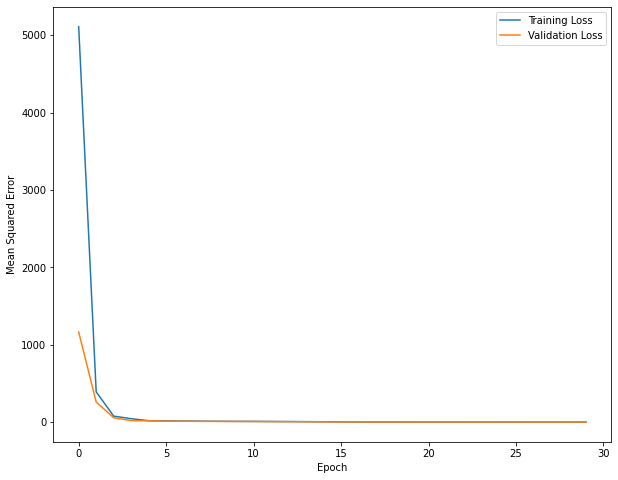

In [ ]:
learning_rate = 0.01


label_name = "vocabulary"


model_deep = create_model_deep(learning_rate, my_feature_layer, [30, 12])


number_epochs = 30

mse_train_deep, mse_val_deep = train_model(model_deep, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep, mse_val_deep)

In [ ]:

test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("cohesion")
test_label = np.array(test_features.pop(label_name))# isolate the label

result_deep = model_deep.evaluate(x=test_features, y=test_label, batch_size=batch_size)

for item in zip(model_deep.metrics_names, result_deep):
  print (item[0], item[1])


4/4 [==============================] - 0s 4ms/step - loss: 0.6062 - mean_squared_error: 0.6062 - accuracy: 0.0026
loss 0.6062394976615906
mean_squared_error 0.6062394976615906
accuracy 0.0025542783550918102


In [ ]:
prediction_deep = model_deep.predict(test_features)

25/25 [==============================] - 1s 3ms/step


In [ ]:
pre_list_deep = []
for value in prediction_deep:
  pre_list_deep.append(value[0])

Calculate accuracy for vocabulary

In [ ]:
vocabulary_accuracy_deep = accuracy_range(pre_list_deep, list(test_data['vocabulary']))
vocabulary_accuracy_deep

0.6513409961685823

In [ ]:
pre_list_2_deep = result(pre_list_deep)

In [ ]:
val_accuracy_2_deep = accuracy(list(test_data['vocabulary']), pre_list_2_deep)
val_accuracy_2_deep

0.3793103448275862

Epoch 1/30


 1/10 [==>...........................] - ETA: 9s - loss: 11713.2695 - mean_squared_error: 11713.2695 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 72ms/step - loss: 2158.4055 - mean_squared_error: 2158.4055 - accuracy: 0.0012 - val_loss: 31.7692 - val_mean_squared_error: 31.7692 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 15ms/step - loss: 191.6865 - mean_squared_error: 191.6865 - accuracy: 0.0012 - val_loss: 33.8644 - val_mean_squared_error: 33.8644 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 16ms/step - loss: 87.5202 - mean_squared_error: 87.5202 - accuracy: 0.0016 - val_loss: 23.7123 - val_mean_squared_error: 23.7123 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 15ms/step - loss: 36.1969 - mean_squared_error: 36.1969 - accuracy: 0.0016 - val_loss: 16.0838 - val_mean_squared_error: 16.0838 - val_accuracy: 0.0032
Epoch 5/30
10/10 [==============================] - 0s 12ms/step - loss: 17.0191 - mean_squared_error: 17.0191 - accuracy: 0.0016 - val_loss: 14.6803 - val_mean_squared_error: 1

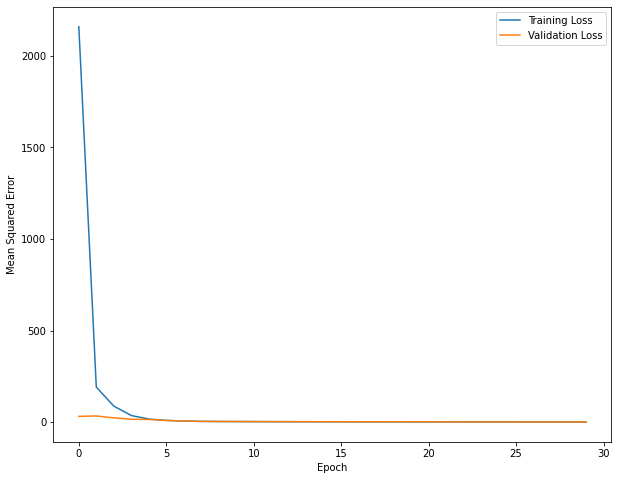

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"


model_deep_cohesion = create_model_deep(learning_rate, my_new_feature_layer)

mse_train_deep_cohesion, mse_val_deep_cohesion = train_model(model_deep_cohesion, train_data, number_epochs, batch_size, label_name)

plot_the_loss_curve(mse_train_deep_cohesion, mse_val_deep_cohesion)

In [ ]:
test_data2 = test_data.copy()
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list_deep
test_features_deep_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_deep_cohesion = np.array(test_features_deep_cohesion.pop("cohesion"))# isolate the label

result_deep_cohesion = model_deep_cohesion.evaluate(x=test_features_deep_cohesion, y=test_label_deep_cohesion, batch_size=batch_size)

for item in zip(model_deep_cohesion.metrics_names, result_deep_cohesion):
  print (item[0], item[1])

4/4 [==============================] - 1s 5ms/step - loss: 0.9908 - mean_squared_error: 0.9908 - accuracy: 0.0038
loss 0.9907976984977722
mean_squared_error 0.9907976984977722
accuracy 0.0038314175326377153


In [ ]:
prediction_deep_cohesion = model_deep_cohesion.predict(test_features_deep_cohesion)
pre_list_deep_cohesion = []
for value in prediction_deep_cohesion:
  pre_list_deep_cohesion.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [ ]:
cohesion_deep_accuracy = accuracy_range(pre_list_deep_cohesion, list(test_data['cohesion']))
cohesion_deep_accuracy

0.5044699872286079

In [ ]:
pre_list_2 = result(pre_list_deep_cohesion)
val_accuracy_2 = accuracy(list(test_data['cohesion']), pre_list_2)
val_accuracy_2

0.26053639846743293

In [ ]:
error_rate5 = error_rate(list(test_data['cohesion']), pre_list_deep_cohesion)
error_rate5

0.6629205697226799

In [ ]:
import pickle
pickle.dump(model_deep, open('nn_model_vocabulary.sav', 'wb'))
pickle.dump(model_deep_cohesion, open('nn_model_cohesion.sav', 'wb'))

In [ ]:
nn_model_vocabulary = pickle.load(open("nn_model_vocabulary.sav", 'rb'))
nn_model_cohesion = pickle.load(open("nn_model_cohesion.sav", 'rb'))

In [ ]:
model_vocabulary_json = model_deep.to_json()
model_cohesion_json = model_deep_cohesion.to_json()

In [ ]:
with open("model_vocabulary_json.json", "w") as json_file:
    json_file.write(model_vocabulary_json)
with open("model_cohesion_json.json", "w") as json_file:
    json_file.write(model_cohesion_json)

In [ ]:
save_path = 'model_nn_vocabulary'
model_deep.save(save_path)

In [ ]:
save_path = 'model_nn_cohesion'
model_deep_cohesion.save(save_path)

In [ ]:
nn1 = tf.keras.models.load_model("model_nn_vocabulary")
nn2 = tf.keras.models.load_model("model_nn_cohesion")

In [ ]:
!zip -r /content/model_nn_vocabulary.zip /content/model_nn_vocabulary

  adding: content/model_nn_vocabulary/ (stored 0%)
  adding: content/model_nn_vocabulary/assets/ (stored 0%)
  adding: content/model_nn_vocabulary/keras_metadata.pb (deflated 95%)
  adding: content/model_nn_vocabulary/saved_model.pb (deflated 91%)
  adding: content/model_nn_vocabulary/variables/ (stored 0%)
  adding: content/model_nn_vocabulary/variables/variables.index (deflated 64%)
  adding: content/model_nn_vocabulary/variables/variables.data-00000-of-00001 (deflated 30%)


In [ ]:
from google.colab import files
files.download("/content/model_nn_vocabulary.zip")

from google.colab import files
files.download("/content/model_nn_cohesion.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/model_nn_cohesion.zip /content/model_nn_cohesion

  adding: content/model_nn_cohesion/ (stored 0%)
  adding: content/model_nn_cohesion/assets/ (stored 0%)
  adding: content/model_nn_cohesion/keras_metadata.pb (deflated 95%)
  adding: content/model_nn_cohesion/saved_model.pb (deflated 91%)
  adding: content/model_nn_cohesion/variables/ (stored 0%)
  adding: content/model_nn_cohesion/variables/variables.index (deflated 65%)
  adding: content/model_nn_cohesion/variables/variables.data-00000-of-00001 (deflated 36%)


Create the deep better model

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 12s - loss: 865.7319 - mean_squared_error: 865.7319 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 70ms/step - loss: 120.5979 - mean_squared_error: 120.5979 - accuracy: 0.0012 - val_loss: 9.6208 - val_mean_squared_error: 9.6208 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 3.6105 - mean_squared_error: 3.6105 - accuracy: 0.0012 - val_loss: 2.3412 - val_mean_squared_error: 2.3412 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 1.2631 - mean_squared_error: 1.2631 - accuracy: 0.0016 - val_loss: 1.4742 - val_mean_squared_error: 1.4742 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 11ms/step - loss: 0.8869 - mean_squared_error: 0.8869 - accuracy: 0.0012 - val_loss: 0.6933 - val_mean_squared_error: 0.6933 - val_accuracy: 0.0032
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 0.6275 - mean_squared_error: 0.6275 - accuracy: 0.0016 - val_loss: 0.7007 - val_mean_squared_error: 0.7007 - val_accuracy: 

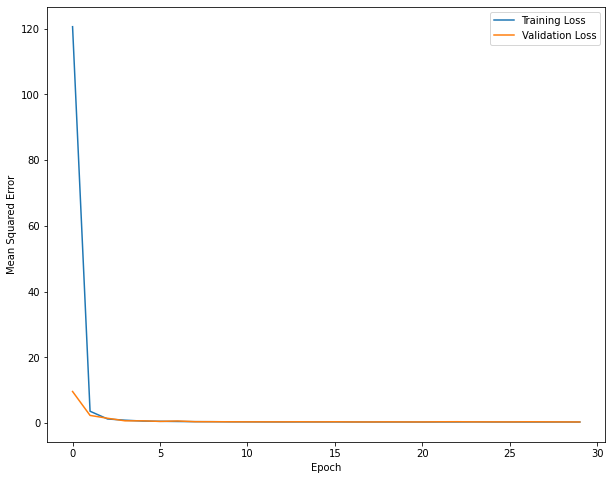

In [ ]:
label_name = "cohesion"
model_deep_better1 = create_model_deep(learning_rate, my_feature_layer, [30, 20, 10, 8])

mse_train_deep_better1, mse_val_deep_better1 = train_model(model_deep_better1,train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep_better1, mse_val_deep_better1)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("vocabulary")
test_label = np.array(test_features.pop(label_name))
prediction_deep_better1 = model_deep_better1.predict(test_features)
pre_list = []
for value in prediction_deep_better1:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
co_accuracy_deep_better = accuracy_range(pre_list, list(test_data['cohesion']))
co_accuracy_deep_better

0.6130268199233716

In [ ]:
co_accuracy2_deep_better = accuracy(list(test_data['cohesion']), pre_list_2)
co_accuracy2_deep_better

0.34099616858237547

In [ ]:
error_rate5 = error_rate(list(test_data['cohesion']), pre_list)
error_rate5

0.4476889639826418

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 9s - loss: 7.4087 - mean_squared_error: 7.4087 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 69ms/step - loss: 19.4271 - mean_squared_error: 19.4271 - accuracy: 0.0000e+00 - val_loss: 10.2710 - val_mean_squared_error: 10.2710 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 9.6677 - mean_squared_error: 9.6677 - accuracy: 0.0000e+00 - val_loss: 9.1294 - val_mean_squared_error: 9.1294 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 8.5666 - mean_squared_error: 8.5666 - accuracy: 0.0000e+00 - val_loss: 8.0668 - val_mean_squared_error: 8.0668 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 7.0744 - mean_squared_error: 7.0744 - accuracy: 0.0000e+00 - val_loss: 3.4034 - val_mean_squared_error: 3.4034 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 1.4529 - mean_squared_error: 1.4529 - accuracy: 0.0000e+00 - val_loss: 1.3349 - val_mean_squa

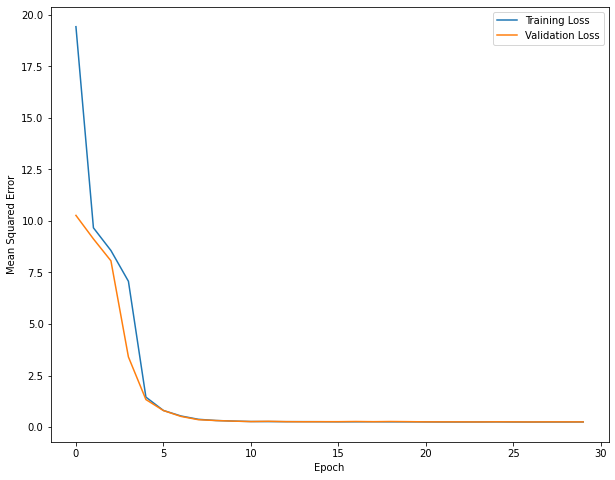

In [ ]:
label_name = "vocabulary"
model_deep_better = create_model_deep(learning_rate, my_feature_layer, [30, 20, 10, 8])

mse_train_deep_better, mse_val_deep_better = train_model(model_deep_better,train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep_better, mse_val_deep_better)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("cohesion")
test_label = np.array(test_features.pop(label_name))# isolate the label

result_deep_better = model_deep_better.evaluate(x=test_features, 
                  y=test_label, 
                  batch_size=batch_size)

for item in zip(model_deep_better.metrics_names, result_deep_better):
  print (item[0], item[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.2149 - mean_squared_error: 0.2149 - accuracy: 0.0026
loss 0.2148696929216385
mean_squared_error 0.2148696929216385
accuracy 0.0025542783550918102


In [ ]:
prediction_deep_better = model_deep_better.predict(test_features)
pre_list = []
for value in prediction_deep_better:
  pre_list.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [ ]:
val_accuracy = accuracy_range(pre_list, list(test_data['vocabulary']))
val_accuracy

0.7100893997445722

In [ ]:
pre_list_2 = result(pre_list)
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.42656449553001274

Epoch 1/30


 1/10 [==>...........................] - ETA: 9s - loss: 4.5023 - mean_squared_error: 4.5023 - accuracy: 0.0000e+00

10/10 [==============================] - 2s 71ms/step - loss: 20.9166 - mean_squared_error: 20.9166 - accuracy: 7.9936e-04 - val_loss: 1.6075 - val_mean_squared_error: 1.6075 - val_accuracy: 0.0032
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 1.5193 - mean_squared_error: 1.5193 - accuracy: 0.0016 - val_loss: 1.4357 - val_mean_squared_error: 1.4357 - val_accuracy: 0.0032
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1385 - mean_squared_error: 1.1385 - accuracy: 0.0016 - val_loss: 0.8858 - val_mean_squared_error: 0.8858 - val_accuracy: 0.0032
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 0.6098 - mean_squared_error: 0.6098 - accuracy: 0.0016 - val_loss: 0.5406 - val_mean_squared_error: 0.5406 - val_accuracy: 0.0032
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 0.4913 - mean_squared_error: 0.4913 - accuracy: 0.0016 - val_loss: 0.4624 - val_mean_squared_error: 0.4624 - val_accuracy

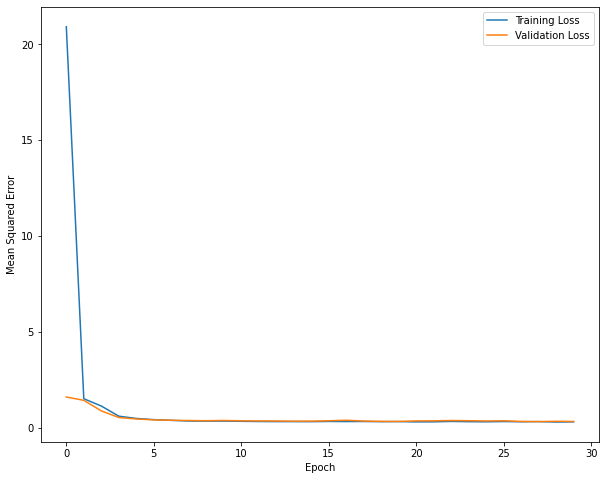

In [ ]:
learning_rate = 0.01
number_epochs = 30
batch_size = 256
label_name = "cohesion"

# Establish the model's topography.
model_deep_better_cohesion = create_model_deep(learning_rate, my_new_feature_layer, [30, 20, 10, 8])

# Train the model on the normalized training set.
mse_train_deep_better_cohesion, mse_val_deep_better_cohesion = train_model(model_deep_better_cohesion, train_data, number_epochs, batch_size, label_name)
#train_history = train_model(model_lr, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_deep_better_cohesion, mse_val_deep_better_cohesion)

In [ ]:
test_data2 = test_data.copy()
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list
test_features_deep_better_cohesion = {name:np.array(value) for name, value in test_data2.items()}

test_label_deep_better_cohesion = np.array(test_features_deep_better_cohesion.pop("cohesion"))# isolate the label

print("\n Evaluate the linear regression model against the test set:")
result_deep_better_cohesion = model_deep_better_cohesion.evaluate(x=test_features_deep_better_cohesion, y=test_label_deep_better_cohesion, batch_size=batch_size)

for item in zip(model_deep_better_cohesion.metrics_names, result_deep_better_cohesion):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
4/4 [==============================] - 0s 4ms/step - loss: 0.3289 - mean_squared_error: 0.3289 - accuracy: 0.0051
loss 0.3288758099079132
mean_squared_error 0.3288758099079132
accuracy 0.0051085567101836205


In [ ]:
prediction_deep_better_cohesion = model_deep_better_cohesion.predict(test_features_deep_better_cohesion)
pre_list_deep_better_cohesion = []
for value in prediction_deep_better_cohesion:
  pre_list_deep_better_cohesion.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [ ]:
cohesion_deep_better_accuracy = accuracy_range(pre_list_deep_better_cohesion, list(test_data['cohesion']))
cohesion_deep_better_accuracy

0.5874840357598978

In [ ]:
pre_list_2 = result(pre_list_deep_better_cohesion)
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.41762452107279696

In [ ]:
error_rate6 = error_rate(list(test_data['cohesion']), pre_list_deep_better_cohesion)
error_rate6

0.46505231266582

Using L2 regression on the model 

In [ ]:
def create_model_deep_L2(my_learning_rate, my_feature_layer, layers=[20, 12], C=0.04):
  model = tf.keras.models.Sequential()
  model.add(my_feature_layer)
  for index, layer in enumerate(layers):
    model.add(tf.keras.layers.Dense(units=layer, 
                                    activation='relu', 
                                    kernel_regularizer=tf.keras.regularizers.l2(C),
                                    name=f'Hidden{index}'))  
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 10s - loss: 338.3982 - mean_squared_error: 338.3438

10/10 [==============================] - 2s 69ms/step - loss: 46.8981 - mean_squared_error: 46.8470 - val_loss: 3.0025 - val_mean_squared_error: 2.9544
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 4.6422 - mean_squared_error: 4.5954 - val_loss: 3.7865 - val_mean_squared_error: 3.7411
Epoch 3/30
10/10 [==============================] - 0s 11ms/step - loss: 2.6235 - mean_squared_error: 2.5786 - val_loss: 1.3566 - val_mean_squared_error: 1.3121
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1952 - mean_squared_error: 1.1506 - val_loss: 1.1786 - val_mean_squared_error: 1.1339
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 0.8791 - mean_squared_error: 0.8342 - val_loss: 0.7812 - val_mean_squared_error: 0.7361
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: 0.6038 - mean_squared_error: 0.5584 - val_loss: 0.5756 - val_mean_squared_error: 0.5300
Epoch 7/30
10/10 [============================

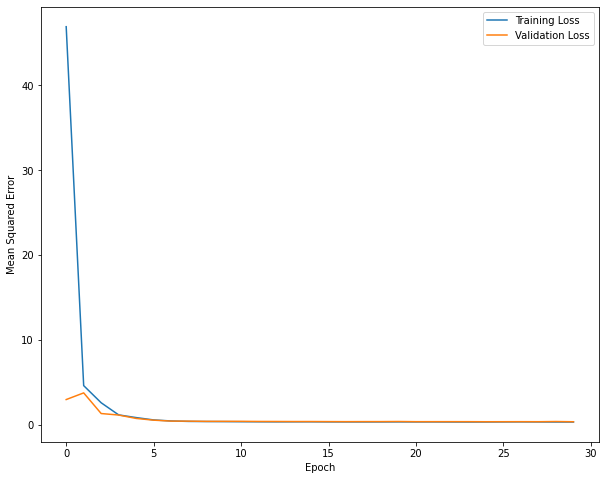

In [ ]:
label_name = "cohesion"

# Establish the model's topography.
model_reg1 = create_model_deep_L2(learning_rate, my_feature_layer, [20, 10, 10, 8], C=0.001)

# Train the model on the normalized training set.
mse_train_reg1, mse_val_reg1 = train_model(model_reg1, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_reg1, mse_val_reg1)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("vocabulary")
test_label = np.array(test_features.pop(label_name))
prediction_reg1 = model_reg1.predict(test_features)
pre_list = []
for value in prediction_reg1:
  pre_list.append(value[0])
pre_list_2 = result(pre_list)

25/25 [==============================] - 0s 3ms/step


In [ ]:
co_accuracy_deep_L2 = accuracy_range(pre_list, list(test_data['cohesion']))
co_accuracy_deep_L2

0.6130268199233716

In [ ]:
co_accuracy2_deep_L2 = accuracy(list(test_data['cohesion']), pre_list_2)
co_accuracy2_deep_L2

0.33205619412515963

In [ ]:
error_rate8 = error_rate(list(test_data['cohesion']), pre_list)
error_rate8

0.4515225179350696

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 1/10 [==>...........................] - ETA: 10s - loss: 454.6159 - mean_squared_error: 454.5579

10/10 [==============================] - 2s 107ms/step - loss: 50.8873 - mean_squared_error: 50.8315 - val_loss: 2.5918 - val_mean_squared_error: 2.5377
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 2.3813 - mean_squared_error: 2.3279 - val_loss: 2.1811 - val_mean_squared_error: 2.1285
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 1.8051 - mean_squared_error: 1.7529 - val_loss: 1.6455 - val_mean_squared_error: 1.5938
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 1.2947 - mean_squared_error: 1.2435 - val_loss: 1.2529 - val_mean_squared_error: 1.2022
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 0.9698 - mean_squared_error: 0.9194 - val_loss: 0.9092 - val_mean_squared_error: 0.8589
Epoch 6/30
10/10 [==============================] - 0s 10ms/step - loss: 0.6395 - mean_squared_error: 0.5891 - val_loss: 0.5375 - val_mean_squared_error: 0.4870
Epoch 7/30
10/10 [=========================

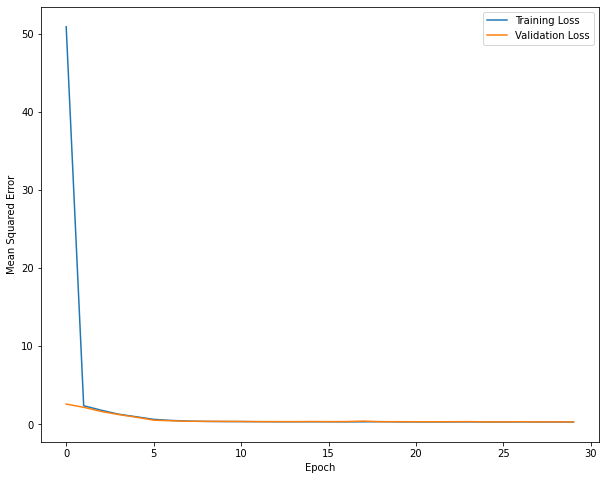

In [ ]:
label_name = "vocabulary"

# Establish the model's topography.
model_reg = create_model_deep_L2(learning_rate, my_feature_layer, [20, 10, 10, 8], C=0.001)

# Train the model on the normalized training set.
mse_train_reg, mse_val_reg = train_model(model_reg, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_reg, mse_val_reg)

In [ ]:
test_features = {name:np.array(value) for name, value in test_data.items()}
test_features.pop("cohesion")
test_label = np.array(test_features.pop(label_name))# isolate the label
result = model_reg.evaluate(x=test_features, 
                  y=test_label, 
                  batch_size=batch_size)

for item in zip(model_reg.metrics_names, result):
  print (item[0], item[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.2744 - mean_squared_error: 0.2304
loss 0.2743791341781616
mean_squared_error 0.23036594688892365


In [ ]:
prediction_deep_L2 = model_reg.predict(test_features)
pre_list = []
for value in prediction_deep_L2:
  pre_list.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [ ]:
val_accuracy = accuracy_range(pre_list, list(test_data['vocabulary']))
val_accuracy

0.7049808429118773

In [ ]:
pre_list_2 = result(pre_list)
val_accuracy_2 = accuracy(list(test_data['vocabulary']), pre_list_2)
val_accuracy_2

0.4240102171136654

Epoch 1/30


 1/10 [==>...........................] - ETA: 10s - loss: 1.8531 - mean_squared_error: 1.7937

10/10 [==============================] - 2s 69ms/step - loss: 10.3196 - mean_squared_error: 10.2673 - val_loss: 2.5185 - val_mean_squared_error: 2.4727
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 2.2963 - mean_squared_error: 2.2536 - val_loss: 1.3617 - val_mean_squared_error: 1.3219
Epoch 3/30
10/10 [==============================] - 0s 9ms/step - loss: 0.8831 - mean_squared_error: 0.8446 - val_loss: 0.8114 - val_mean_squared_error: 0.7742
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 0.6478 - mean_squared_error: 0.6112 - val_loss: 0.6938 - val_mean_squared_error: 0.6580
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 0.5292 - mean_squared_error: 0.4937 - val_loss: 0.5227 - val_mean_squared_error: 0.4876
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: 0.4631 - mean_squared_error: 0.4281 - val_loss: 0.4898 - val_mean_squared_error: 0.4550
Epoch 7/30
10/10 [==============================

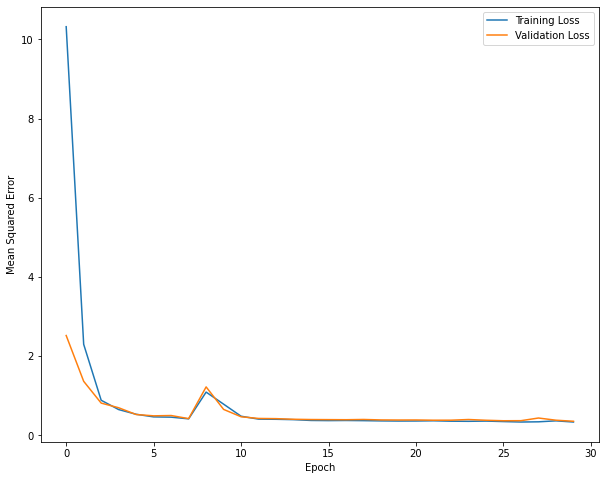

In [ ]:
label_name = "cohesion"

# Establish the model's topography.
model_reg_cohesion = create_model_deep_L2(learning_rate, my_new_feature_layer, [20, 10, 10, 8], C=0.001)

# Train the model on the normalized training set.
mse_train_reg_cohesion, mse_val_reg_cohesion = train_model(model_reg_cohesion, train_data, number_epochs, batch_size, label_name)
plot_the_loss_curve(mse_train_reg_cohesion, mse_val_reg_cohesion)

In [ ]:
test_data2 = test_data.copy()
test_data2.pop("vocabulary")
test_data2["vocabulary"] = pre_list
test_features = {name:np.array(value) for name, value in test_data2.items()}

test_label = np.array(test_features.pop(label_name))# isolate the label
result = model_reg_cohesion.evaluate(x=test_features, 
                  y=test_label, 
                  batch_size=batch_size)

for item in zip(model_reg_cohesion.metrics_names, result):
  print (item[0], item[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.3404 - mean_squared_error: 0.3109
loss 0.3404473662376404
mean_squared_error 0.31091615557670593


In [ ]:
prediction_deep_L2_cohesion = model_reg_cohesion.predict(test_features)
pre_list = []
for value in prediction_deep_L2_cohesion:
  pre_list.append(value[0])

25/25 [==============================] - 0s 3ms/step


In [ ]:
val_accuracy = accuracy_range(pre_list, list(test_data['cohesion']))
val_accuracy

0.6002554278416348

In [ ]:
pre_list_2 = result(pre_list)
val_accuracy_2 = accuracy(list(test_data['cohesion']), pre_list_2)
val_accuracy_2

0.3384418901660281

In [ ]:
error_rate7 = error_rate(list(test_data['cohesion']), pre_list)
error_rate7

0.447774910530977